In [2]:
import pickle
import numpy
from scipy import stats as scistats
from matplotlib import pyplot as matpyplot


# Processing features

In [3]:
with open(
    './gnss_test_raw_data_1713259013.4408054_features.pickle',
    'rb') as handle:

    gnss_batch_data = pickle.load(handle)

print(len(gnss_batch_data))

16109


In [4]:
gnss_batch_narray = numpy.array(gnss_batch_data)
gnss_batch_narray.shape

(16109, 20)

In [5]:
# Second file (normally closer to building messages)
with open(
    './gnss_test_raw_data_1713259484.0477698_features.pickle',
    'rb') as handle:

    gnss_batch_data_closer = pickle.load(handle)

print(len(gnss_batch_data_closer))

gnss_batch_narray_closer = numpy.array(gnss_batch_data_closer)
gnss_batch_narray_closer.shape

4670


(4670, 20)

# Features name (Columns)

Batch, Full sat id, gnss id, sat id, CNo, PR, DM, HD, VD, PD, TD, El, Az, NSV, Multipath, PR RMS, Std LatErr, Std LonErr, Range RMS, Noise LVL

- Batch: The group of satellites, or moment in which the data was captured
- Full sat id: The combination of the GNSS ID and Satellite ID
- CNo: Carrier-to-Noise Ratio
- PR: Pseudorange Residual
- DM: Doppler Measurement
- HD: HDOP
- VD: VDOP
- PD: PDOP
- TD: TDOP
- El: Elevation
- Az: Azymuth
- NSV: Number of visible satellites
- Multipath: Multipath indicator
- Pseudorange RMS Error
- Std LatErr: Standar Deviation of Latitude Error
- Std LatErr: Standar Deviation of Latitude Error
- Range RMS: RMS value of the std of the ranges
- Noise LVL: Noise Level as measured by the GPS

Given that some of this features are influenced by the movement of the receiver
and the idea is to train the model on-site, some of them will be left out or
added discrecionally after the first experiments.

The selected features to process and to use in the initial models are:
- Carrier to Noise Ratio
- Pseudorange Residual
- HDOP
- VDOP
- Number of visible satellites
- Multipath Indicator

For Carrier to Noise Ratio, Pseudorange Residual, and Multipath Indicator is
necessary to summarize them as they are given for each satellite. The remaning
features are for the receiver as a whole.

## Pre-Processing
### 1st Step: Transforming batch data to a single row

*Or one element in a list*

In [6]:
batches_ids = gnss_batch_narray[:, 0]
batches_uniques, batches_idxs = numpy.unique(batches_ids, return_index=True)
print(f'# of different batches: {len(batches_uniques)}')

gnss_data_per_batch = numpy.split(gnss_batch_narray, batches_idxs[1:])
print(f'Batches group idxs (start of the array): {(batches_idxs[:10])}')
print(f'Number of batches divided: {len(gnss_data_per_batch)}')
print(f'First batch shape example: {gnss_data_per_batch[0].shape}')
print(f'First bach data example: {gnss_data_per_batch[0]}')
print(f'Last batch shape example: {gnss_data_per_batch[-1].shape}')

# of different batches: 968
Batches group idxs (start of the array): [  0  16  31  46  61  76  91 106 121 136]
Number of batches divided: 968
First batch shape example: (16, 20)
First bach data example: [[0 '69' 6 9 35 0 -2212.8 3.64 5.25 6.39 3.51 0 0 16 1 11 0 0 0 0]
 [0 '6255' 6 255 24 0 2925.2 3.64 5.25 6.39 3.51 0 0 16 1 39 0 0 0 0]
 [0 '029' 0 29 26 1.8 1830.0 3.64 5.25 6.39 3.51 67 221 16 1 17 0 0 0 0]
 [0 '06' 0 6 19 0.0 -2484.8 3.64 5.25 6.39 3.51 9 33 16 1 25 0 0 0 0]
 [0 '04' 0 4 25 -1.6 1411.8 3.64 5.25 6.39 3.51 14 345 16 1 26 0 0 0 0]
 [0 '012' 0 12 31 5.5 -3108.0 3.64 5.25 6.39 3.51 29 123 16 1 12 0 0 0 0]
 [0 '025' 0 25 26 -1.2 -1854.2 3.64 5.25 6.39 3.51 57 142 16 1 15 0 0 0 0]
 [0 '313' 3 13 34 0 1584.2 3.64 5.25 6.39 3.51 0 0 16 1 3 0 0 0 0]
 [0 '38' 3 8 33 0 1381.6 3.64 5.25 6.39 3.51 0 0 16 1 0 0 0 0 0]
 [0 '026' 0 26 12 0.0 3821.4 3.64 5.25 6.39 3.51 19 294 16 1 32 0 0 0 0]
 [0 '020' 0 20 23 2.0 2448.2 3.64 5.25 6.39 3.51 24 90 16 1 26 0 0 0 0]
 [0 '05' 0 5 19 0.0

In [8]:
# Closer data

batches_closer_ids = gnss_batch_narray_closer[:, 0]
batches_closer_uniques, batches_closer_idxs = numpy.unique(
    batches_closer_ids,
    return_index=True
)
print(f'# of different batches: {len(batches_closer_uniques)}')

gnss_closer_data_per_batch = numpy.split(
    gnss_batch_narray_closer,
    batches_closer_idxs[1:]
)
print(f'Batches group idxs (start of the array): {(batches_closer_idxs[:10])}')
print(f'Number of batches divided: {len(gnss_closer_data_per_batch)}')
print(f'First batch shape example: {gnss_closer_data_per_batch[0].shape}')
print(f'First bach data example: {gnss_closer_data_per_batch[0]}')
print(f'Last batch shape example: {gnss_closer_data_per_batch[-1].shape}')

# of different batches: 400
Batches group idxs (start of the array): [  0  19  38  57  76  95 114 133 152 171]
Number of batches divided: 400
First batch shape example: (19, 20)
First bach data example: [[0 '04' 0 4 8 -100.5 1073.4 0 0 0 0 14 342 19 None 0 0 0 0 0]
 [0 '05' 0 5 10 84.2 3819.2 0 0 0 0 10 117 19 None 0 0 0 0 0]
 [0 '06' 0 6 0 0.0 0 0 0 0 0 6 33 19 None 0 0 0 0 0]
 [0 '011' 0 11 0 0.0 0 0 0 0 0 35 56 19 None 0 0 0 0 0]
 [0 '012' 0 12 21 7.5 -3278.0 0 0 0 0 26 124 19 None 0 0 0 0 0]
 [0 '020' 0 20 15 21.3 2164.8 0 0 0 0 25 88 19 None 0 0 0 0 0]
 [0 '025' 0 25 20 -6.4 -2117.2 0 0 0 0 54 142 19 None 0 0 0 0 0]
 [0 '026' 0 26 0 0.0 0 0 0 0 0 22 294 19 None 0 0 0 0 0]
 [0 '028' 0 28 17 0.0 -948.0 0 0 0 0 46 248 19 None 0 0 0 0 0]
 [0 '029' 0 29 19 1.9 1530.2 0 0 0 0 70 219 19 None 0 0 0 0 0]
 [0 '031' 0 31 11 80.3 0 0 0 0 0 41 290 19 None 0 0 0 0 0]
 [0 '1123' 1 123 0 0.0 0 0 0 0 0 21 169 19 None 0 0 0 0 0]
 [0 '1126' 1 126 0 0.0 0 0 0 0 0 13 134 19 None 0 0 0 0 0]
 [0 '1127' 

### 2nd Step: Summarizing satellite information in the same row
#### Features to summarize (per satellite):

1. Carrier noise ratio
2. Pseudorange residual
3. Multipath indicator

The reamining features are the same in the whole batch.

Features:
Batch, Full sat id, gnss id, sat id, CNo, PR, DM, HD, VD, PD, TD, El, Az, NSV, Multipath, LatErr, LonErr, Range RMS, Noise Lvl

This means:

A - "Delete (ignore)" the first 4 columns.

B - Add CNo mean, and CNo std as 2 new columns

C - Add PR mean, and PR std as 2 new columns

D - Remain the DOPs and NSV values

E - Add the Multipath mode as 1 new column

New column features:
cno_mean, cno_std, pr_mean, pr_std, dops*(9), nsv, multipath_mode

In [9]:
# Features names

FEATURES_NAMES = [
    'CNo Mean', 'CNo Std',
    'PR Res. Mean', 'PR Res. Std',
    'HDOP', 'VDOP', 'PDOP',
    '# Sat.',
    'Elevation', 'Azymuth',
    'Doopler', 
    # 'PR RMS', 'Std LatErr', 'StdLonErr', 'Range RMS', 'Noise LVL'
]

In [10]:
def compute_features_gnss_data(
        gnss_data_array,
        n_features=9,
        remove_none=True,
):
    gnss_features = numpy.zeros((len(gnss_data_array), n_features))

    for batch_n, gnss_data_in_batch in enumerate(gnss_data_array):
        # Remove Satellites with None
        if remove_none:
            temp_batch = numpy.where(
                numpy.isin(gnss_data_in_batch, [None]),
                numpy.nan,
                gnss_data_in_batch
            ).astype(float)
            gnss_data_in_batch = temp_batch[
                ~numpy.isnan(temp_batch).any(axis=1)
            ]

            # Compute only when removing none
            multipa_batch = scistats.mode(gnss_data_in_batch[:, 14]).mode
        else:
            multipa_batch = 0

        cno_mean_batch = gnss_data_in_batch[:, 4].mean()
        cno_std_batch = gnss_data_in_batch[:, 4].std()

        pr_mean_batch = gnss_data_in_batch[:, 5].mean()
        pr_std_batch = gnss_data_in_batch[:, 5].std()

        dopm_mean_batch = gnss_data_in_batch[:, 6].std()

        hdop_batch = gnss_data_in_batch[0, 7]
        vdop_batch = gnss_data_in_batch[0, 8]
        pdop_batch = gnss_data_in_batch[0, 9]

        elevation_batch = gnss_data_in_batch[:, 11].mean()
        azymuth_batch = gnss_data_in_batch[:, 12].mean()

        nvs_batch = gnss_data_in_batch[0, 13]

        # pr_rms_batch = gnss_data_in_batch[:, 15].mean()
        
        # std_lat_err_batch = gnss_data_in_batch[0, 16]
        # std_lon_err_batch = gnss_data_in_batch[0, 17]
        # range_rms_batch = gnss_data_in_batch[0, 18]

        # noise_lvl_batch = gnss_data_in_batch[0, 19]
        
        gnss_features[batch_n] = numpy.array([
            cno_mean_batch, cno_std_batch,
            pr_mean_batch, pr_std_batch,
            hdop_batch, vdop_batch, pdop_batch,
            nvs_batch, 
            # multipa_batch,
            elevation_batch, azymuth_batch,
            dopm_mean_batch, # pr_rms_batch,
            # std_lat_err_batch, std_lon_err_batch, range_rms_batch,
            # noise_lvl_batch
        ]).astype(float)

    print(gnss_features.shape)
    return gnss_features

In [12]:
gnss_features = compute_features_gnss_data(
    gnss_data_per_batch,
    remove_none=False,
    n_features=len(FEATURES_NAMES),
)

(968, 11)


In [13]:
gnss_closer_features = compute_features_gnss_data(
    gnss_closer_data_per_batch,
    remove_none=False,
    n_features=len(FEATURES_NAMES),
)

(400, 11)


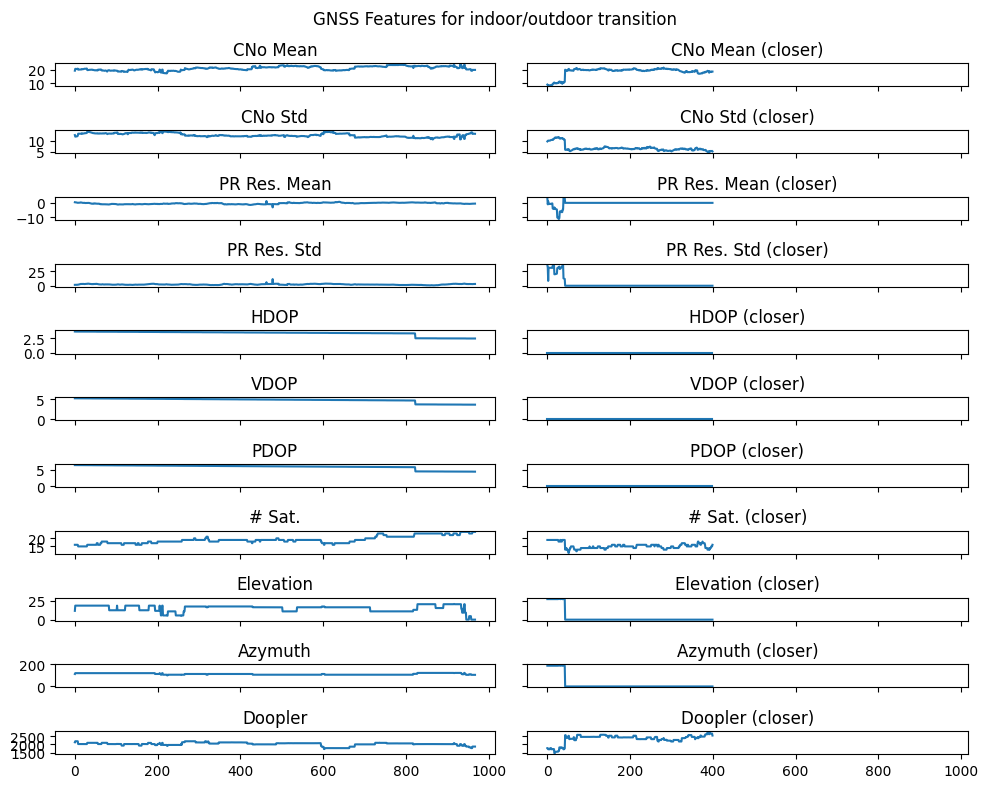

In [15]:
fig, axs = matpyplot.subplots(
    nrows=gnss_features.shape[1],
    ncols=2,
    sharex=True,
    sharey='row',
    figsize=(10, 8)
)

fig.suptitle('GNSS Features for indoor/outdoor transition')
for n, axi in enumerate(axs):
    axi[0].plot(range(0, len(gnss_features)), gnss_features[:, n])
    axi[1].plot(range(0, len(gnss_closer_features)), gnss_closer_features[:, n])
    axi[0].set_title(FEATURES_NAMES[n])
    axi[1].set_title(f'{FEATURES_NAMES[n]} (closer)')

fig.tight_layout()

# Inspecting Delay embedding for some features

In [16]:
from gtda.time_series import SingleTakensEmbedding
from sklearn.decomposition import PCA

## PDOP

In [17]:
max_embedding_dimension = 30
max_time_delay = 20
stride = 1

embedder_pdop = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

extended_pdop_data = numpy.tile(gnss_features[:150, 6], 10)
embedder_pdop.fit(extended_pdop_data)
pdod_embedded_train = embedder_pdop.transform(gnss_features[:150, 6])
pdod_embedded = embedder_pdop.transform(gnss_features[:, 6])
print(f"Shape of embedded time series: {pdod_embedded.shape}")
print(
    f"Optimal embedding dimension is {embedder_pdop.dimension_} and "
    f"time delay is {embedder_pdop.time_delay_}"
)

Shape of embedded time series: (961, 2)
Optimal embedding dimension is 2 and time delay is 7


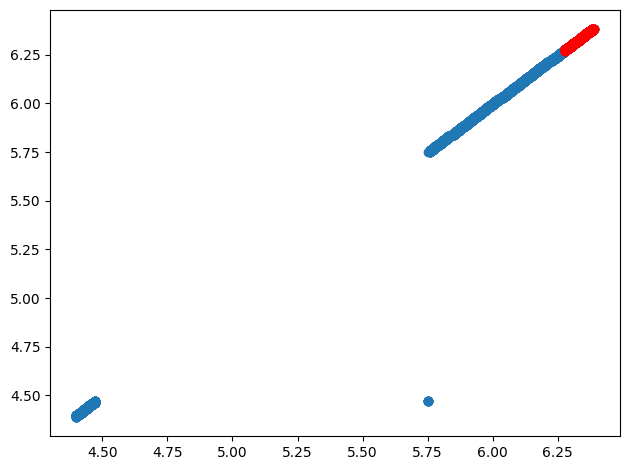

In [18]:
fig, ax = matpyplot.subplots(1)

ax.scatter(pdod_embedded[:, 0], pdod_embedded[:, 1])
ax.scatter(pdod_embedded_train[:, 0], pdod_embedded_train[:, 1], c='r')

fig.tight_layout()

## Pseudorange Residual (mean)

In [19]:
max_embedding_dimension = 5
max_time_delay = 1
stride = 1

embedder_pr_mean = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

pr_mean_embedded = embedder_pr_mean.fit_transform(gnss_features[:, 2])
print(f"Shape of embedded time series: {pr_mean_embedded.shape}")
print(
    f"Optimal embedding dimension is {embedder_pr_mean.dimension_} and "
    f"time delay is {embedder_pr_mean.time_delay_}"
)

Shape of embedded time series: (964, 5)
Optimal embedding dimension is 5 and time delay is 1


In [20]:
# Adding Closer data to the same plot

pr_mean_closer_embedded = embedder_pr_mean.transform(
    gnss_closer_features[:, 2]
)

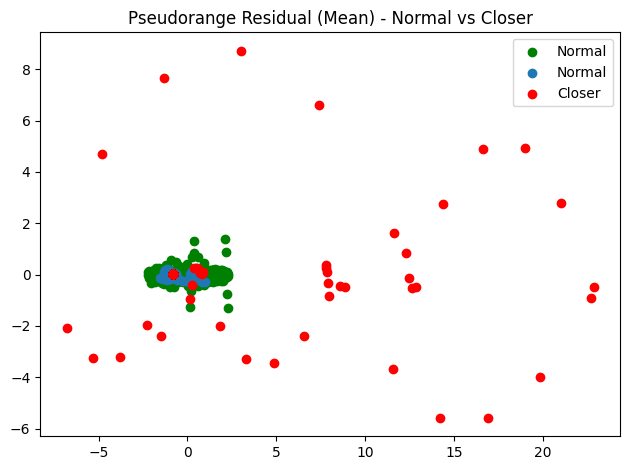

In [21]:
pr_mean_pca = PCA(n_components=2)
pr_mean_embedded_pca = pr_mean_pca.fit_transform(pr_mean_embedded)
pr_mean_closer_embedded_pca = pr_mean_pca.transform(pr_mean_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    pr_mean_embedded_pca[60:, 0], pr_mean_embedded_pca[60:, 1],
    label='Normal',
    c='g'
)
ax.scatter(
    pr_mean_embedded_pca[:60, 0], pr_mean_embedded_pca[:60, 1],
    label='Normal'
)
ax.scatter(
    pr_mean_closer_embedded_pca[:, 0], pr_mean_closer_embedded_pca[:, 1],
    c='r',
    label='Closer'
)
ax.set_title('Pseudorange Residual (Mean) - Normal vs Closer')
ax.legend()

fig.tight_layout()

## CNo (mean)

In [31]:
max_embedding_dimension = 5
max_time_delay = 1
stride = 1

embedder_cno_mean = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

embedder_cno_mean.fit(gnss_features[:, 0])
cno_mean_embedded = embedder_cno_mean.transform(gnss_features[:, 0])
print(f"Shape of embedded time series: {cno_mean_embedded.shape}")
print(
    f"Optimal embedding dimension is {embedder_cno_mean.dimension_} and "
    f"time delay is {embedder_cno_mean.time_delay_}"
)

Shape of embedded time series: (964, 5)
Optimal embedding dimension is 5 and time delay is 1


In [32]:
# Adding Closer data to the same plot

cno_mean_closer_embedded = embedder_cno_mean.transform(
    gnss_closer_features[:, 0]
)
print(f"Shape of embedded time series: {cno_mean_closer_embedded.shape}")

Shape of embedded time series: (396, 5)


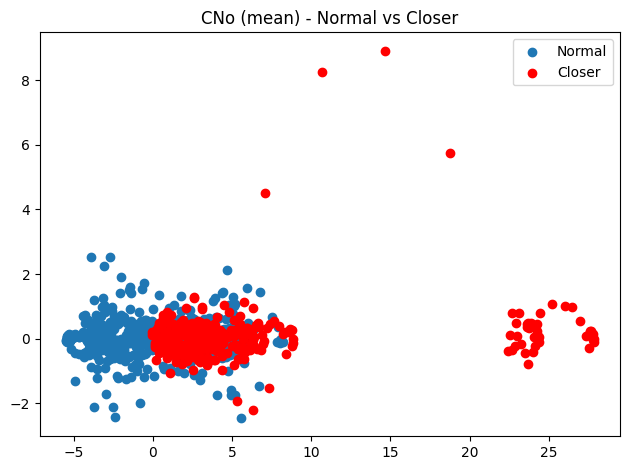

In [33]:
cno_mean_pca = PCA(n_components=2)
cno_mean_embedded_pca = cno_mean_pca.fit_transform(cno_mean_embedded)
cno_mean_closer_embedded_pca = cno_mean_pca.transform(cno_mean_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    cno_mean_embedded_pca[:, 0], cno_mean_embedded_pca[:, 1],
    label='Normal'
)
ax.scatter(
    cno_mean_closer_embedded_pca[:, 0], cno_mean_closer_embedded_pca[:, 1],
    c='r',
    label='Closer'
)
ax.set_title('CNo (mean) - Normal vs Closer')
ax.legend()

fig.tight_layout()

## CNo (std)

In [34]:
max_embedding_dimension = 5
max_time_delay = 1
stride = 1

embedder_cno_std = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

cno_std_embedded = embedder_cno_std.fit_transform(gnss_features[:, 1])
print(f"Shape of embedded time series: {cno_std_embedded.shape}")
print(
    f"Optimal embedding dimension is {embedder_cno_std.dimension_} and "
    f"time delay is {embedder_cno_std.time_delay_}"
)

Shape of embedded time series: (964, 5)
Optimal embedding dimension is 5 and time delay is 1


In [35]:
# Adding Closer data to the same plot

cno_std_closer_embedded = embedder_cno_std.transform(
    gnss_closer_features[:, 1]
)
print(f"Shape of embedded time series: {cno_std_closer_embedded.shape}")

Shape of embedded time series: (396, 5)


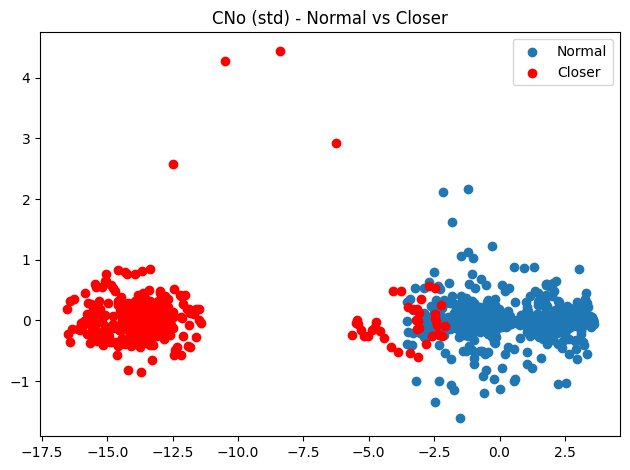

In [36]:
cno_std_pca = PCA(n_components=2)
cno_std_embedded_pca = cno_std_pca.fit_transform(cno_std_embedded)
cno_std_closer_embedded_pca = cno_std_pca.transform(cno_std_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    cno_std_embedded_pca[:, 0], cno_std_embedded_pca[:, 1],
    label='Normal'
)
ax.scatter(
    cno_std_closer_embedded_pca[:, 0], cno_std_closer_embedded_pca[:, 1],
    c='r',
    label='Closer'
)
ax.set_title('CNo (std) - Normal vs Closer')
ax.legend()

fig.tight_layout()

# Training One-Class SVM Models

Exploring the model performance and behavior for different features

In [37]:
from sklearn import svm as sklearn_svm
from sklearn.preprocessing import StandardScaler

## Training One-Class SVM with CNo (mean)

In [52]:
clf_model = sklearn_svm.OneClassSVM(nu=0.05)
clf_model.fit(cno_mean_embedded[:300])

cno_trans_det = clf_model.predict(cno_mean_embedded[300:])
print((cno_trans_det[cno_trans_det > 0]).shape)
accuracy_w_training = (
    len(cno_trans_det[cno_trans_det > 0]) / len(cno_trans_det)
)
print(f'Accuracy of the model: {accuracy_w_training}')

(231,)
Accuracy of the model: 0.34789156626506024


In [53]:
cno_closer_trans_det = clf_model.predict(cno_mean_closer_embedded)
print((cno_closer_trans_det[cno_closer_trans_det > 0]).shape)

(338,)


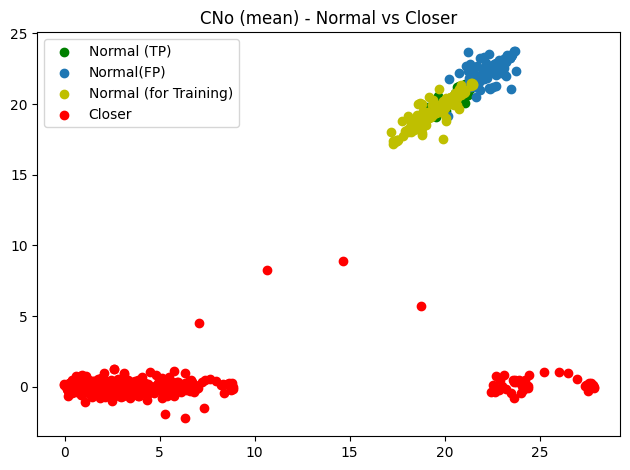

In [56]:
cno_mean_pca = PCA(n_components=2)
cno_mean_embedded_pca = cno_mean_pca.fit_transform(cno_mean_embedded)
cno_mean_closer_embedded_pca = cno_mean_pca.transform(cno_mean_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    cno_mean_embedded[300:, 0][cno_trans_det > 0], cno_mean_embedded[300:, 1][cno_trans_det > 0],
    label='Normal (TP)',
    c='g'
)
ax.scatter(
    cno_mean_embedded[300:, 0][cno_trans_det < 0], cno_mean_embedded[300:, 1][cno_trans_det < 0],
    label='Normal(FP)',
)
ax.scatter(
    cno_mean_embedded[:300, 0], cno_mean_embedded[:300, 1],
    c='y',
    label='Normal (for Training)'
)
ax.scatter(
    cno_mean_closer_embedded_pca[:, 0], cno_mean_closer_embedded_pca[:, 1],
    c='r',
    label='Closer'
)
ax.set_title('CNo (mean) - Normal vs Closer')
ax.legend()

fig.tight_layout()

## Training One-Class SVM with CNo (Std)

In [48]:
clf_model = sklearn_svm.OneClassSVM(nu=0.05)
clf_model.fit(cno_std_embedded[:300])

cno_trans_det = clf_model.predict(cno_std_embedded[300:])
print((cno_trans_det[cno_trans_det > 0]).shape)
accuracy_w_training = (
    len(cno_trans_det[cno_trans_det > 0]) / len(cno_trans_det)
)
print(f'Accuracy of the model: {accuracy_w_training}')

(366,)
Accuracy of the model: 0.5512048192771084


In [57]:
cno_closer_trans_det = clf_model.predict(cno_std_closer_embedded)
print((cno_closer_trans_det[cno_closer_trans_det > 0]).shape)

(0,)


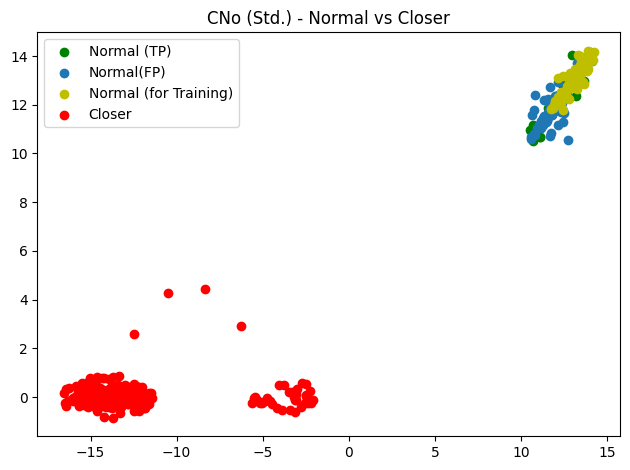

In [58]:
cno_std_pca = PCA(n_components=2)
cno_std_embedded_pca = cno_std_pca.fit_transform(cno_std_embedded)
cno_std_closer_embedded_pca = cno_std_pca.transform(cno_std_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    cno_std_embedded[300:, 0][cno_trans_det > 0], cno_std_embedded[300:, 1][cno_trans_det > 0],
    label='Normal (TP)',
    c='g'
)
ax.scatter(
    cno_std_embedded[300:, 0][cno_trans_det < 0], cno_std_embedded[300:, 1][cno_trans_det < 0],
    label='Normal(FP)',
)
ax.scatter(
    cno_std_embedded[:300, 0], cno_std_embedded[:300, 1],
    c='y',
    label='Normal (for Training)'
)
ax.scatter(
    cno_std_closer_embedded_pca[:, 0], cno_std_closer_embedded_pca[:, 1],
    c='r',
    label='Closer'
)
ax.set_title('CNo (Std.) - Normal vs Closer')
ax.legend()

fig.tight_layout()

## Training One-Class SVM with Pseudorange Residual (mean)

In [44]:
pr_clf_model = sklearn_svm.OneClassSVM(nu=0.05)
pr_clf_model.fit(pr_mean_embedded[:60])

pr_trans_det = pr_clf_model.predict(pr_mean_embedded)
print((pr_trans_det[pr_trans_det > 0]).shape)
pr_accuracy_w_training = (
    len(pr_trans_det[pr_trans_det > 0]) / len(pr_trans_det)
)
print(f'Accuracy of the model: {pr_accuracy_w_training}')

(532,)
Accuracy of the model: 0.5518672199170125


In [45]:
pr_closer_trans_det = pr_clf_model.predict(pr_mean_closer_embedded)
print((pr_closer_trans_det[pr_closer_trans_det > 0]).shape)

(354,)


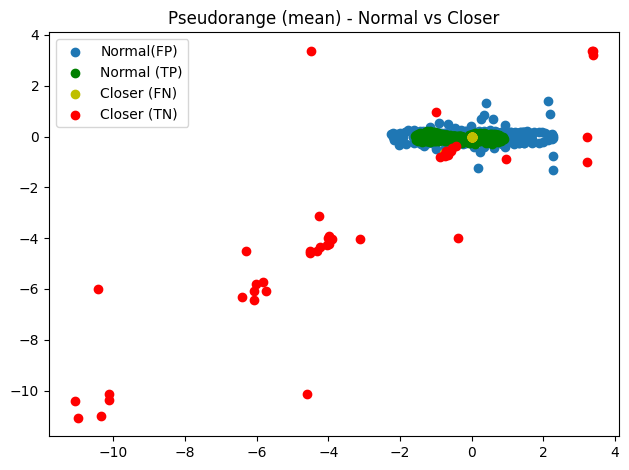

In [46]:
pr_mean_pca = PCA(n_components=2)
pr_mean_embedded_pca = cno_mean_pca.fit_transform(pr_mean_embedded)
pr_mean_closer_embedded_pca = cno_mean_pca.transform(pr_mean_closer_embedded)

fig, ax = matpyplot.subplots(1)
ax.scatter(
    pr_mean_embedded_pca[pr_trans_det < 0][:, 0], pr_mean_embedded_pca[pr_trans_det < 0][:, 1],
    label='Normal(FP)',
)
ax.scatter(
    pr_mean_embedded_pca[pr_trans_det > 0][:, 0], pr_mean_embedded_pca[pr_trans_det > 0][:, 1],
    label='Normal (TP)',
    c='g'
)
ax.scatter(
    pr_mean_closer_embedded[pr_closer_trans_det > 0][:, 0], pr_mean_closer_embedded[pr_closer_trans_det > 0][:, 1],
    c='y',
    label='Closer (FN)'
)
ax.scatter(
    pr_mean_closer_embedded[pr_closer_trans_det < 0][:, 0], pr_mean_closer_embedded[pr_closer_trans_det < 0][:, 1],
    c='r',
    label='Closer (TN)'
)
ax.set_title('Pseudorange (mean) - Normal vs Closer')
ax.legend()

fig.tight_layout()